
# Plan de Prétraitement des Données

**Mini-projet 3 – Classification de la densité urbaine**

---

## 1. Chargement et inspection initiale

**Objectif : comprendre l’état brut des données**

* Charger `geo_urban_density_data.csv`
* Afficher :

  * dimensions du dataset
  * types des variables
  * premières lignes
* Identifier :

  * variables explicatives
  * variables spatiales
  * variable cible

📌 **Justification**
Cette étape permet de détecter dès le départ les incohérences et erreurs potentielles.

---

## 2. Harmonisation et nettoyage des colonnes

**Objectif : rendre les données propres et cohérentes**

* Uniformiser les noms des colonnes :

  * minuscules
  * suppression des espaces
  * caractères spéciaux
* Vérifier les modalités de `classe_urbaine`

  * (faible / moyenne / élevée)

📌 **Justification**
Des noms cohérents facilitent le traitement automatique et évitent les erreurs.

---

## 3. Suppression des colonnes non utilisables

**Objectif : respecter les consignes du projet**

* Supprimer :

  * `zone_id`
* Séparer (mais ne pas supprimer) :

  * `latitude`
  * `longitude`

📌 **Justification**
Les variables spatiales sont **réservées aux visualisations** et **exclues des modèles ML**.

---

## 4. Détection et suppression des doublons

**Objectif : éviter un biais d’apprentissage**

* Vérifier l’existence de lignes dupliquées
* Supprimer les doublons si présents

📌 **Justification**
Les doublons faussent les statistiques et les performances des modèles.

---

## 5. Analyse des valeurs manquantes

**Objectif : identifier les problèmes de qualité**

* Calculer le pourcentage de valeurs manquantes par variable
* Visualiser les valeurs manquantes (heatmap ou tableau)

📌 **Justification**
Permet de choisir une stratégie adaptée de traitement.

---

## 6. Traitement des valeurs manquantes

**Objectif : conserver un dataset exploitable**

* Supprimer :

  * lignes quasi vides
* Imputer les variables numériques :

  * moyenne ou médiane (choix justifié)
* ❌ **Aucune imputation de la variable cible `classe_urbaine`**

📌 **Justification**
L’imputation limite la perte d’information sans introduire de biais majeur.

---

## 7. Détection des valeurs aberrantes (outliers)

**Objectif : améliorer la robustesse des modèles**

* Identifier les outliers :

  * boxplots
  * méthode IQR
* Décider :

  * conservation
  * ou suppression (justifiée)

📌 **Justification**
Les valeurs extrêmes peuvent perturber fortement certains modèles (KNN, SVM).

---

## 8. Encodage de la variable cible

**Objectif : rendre la cible exploitable par les modèles**

* Encoder `classe_urbaine` :

  * faible → 0
  * moyenne → 1
  * élevée → 2
* Vérifier la cohérence des labels

📌 **Justification**
Les algorithmes ML nécessitent une variable cible numérique.

---

## 9. Normalisation / Standardisation des variables numériques

**Objectif : mettre toutes les variables sur la même échelle**

* Appliquer :

  * `StandardScaler` ou `MinMaxScaler`
* Conserver les paramètres pour le jeu de test

📌 **Justification**
Indispensable pour les modèles basés sur la distance.

---

## 10. Vérification finale après prétraitement

**Objectif : valider le travail**

* Vérifier :

  * absence de valeurs manquantes
  * cohérence des distributions
  * taille finale du dataset
* Visualisations après nettoyage :

  * histogrammes
  * boxplots

📌 **Justification**
Confirme que le dataset est prêt pour la modélisation.

---

## Résultat attendu

Un dataset :

* propre
* cohérent
* sans biais évident
* prêt pour le **split Train/Test**
* utilisable par **tous les modèles**



## 0. Importation des Bibliothèques Requises

**Objectif : charger tous les outils nécessaires pour le prétraitement**

Nous importons pandas, numpy, matplotlib, et seaborn pour manipuler et visualiser les données.


In [2]:
# =========================================
# Étape 0 : Importation des bibliothèques
# Mini-projet 3 – Classification de la densité urbaine
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Configuration des visualisations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Toutes les bibliothèques ont été importées avec succès !")


Toutes les bibliothèques ont été importées avec succès !


## 1. Chargement et Inspection Initiale

**Objectif : comprendre l'état brut des données**

- Charger `geo_urban_density_data.csv`
- Afficher : dimensions, types de variables, premières lignes
- Identifier : variables explicatives, spatiales, cible

**Justification** : Détecter dès le départ les incohérences et erreurs potentielles


In [3]:
# =========================================
# Étape 1 : Chargement et inspection initiale
# =========================================

# 1) Chargement du dataset CSV
df = pd.read_csv("data/geo_urban_density_data.csv")

# 2) Affichage des dimensions du dataset
print("DIMENSIONS DU DATASET")
print(f"   Nombre de lignes : {df.shape[0]}")
print(f"   Nombre de colonnes : {df.shape[1]}")

# 3) Types de données
print("\nTYPES DE VARIABLES")
print(df.dtypes)

# 4) Premières lignes
print("\nPREMIERES LIGNES DU DATASET")
print(df.head())

# 5) Informations générales (y compris valeurs manquantes)
print("\nINFORMATIONS GENERALES")
df.info()

# 6) Statistiques descriptives
print("\nSTATISTIQUES DESCRIPTIVES")
print(df.describe())

# 7) Identification des variables
variables_explicatives = [
    "densite_batiments",
    "densite_population", 
    "taux_impermeabilisation",
    "distance_centre_ville_km",
    "hauteur_moyenne_batiments",
    "wifi_density_probe"
]

variables_spatiales = ["latitude", "longitude", "zone_id"]
variable_cible = "classe_urbaine"

print("\nIDENTIFICATION DES VARIABLES")
print(f"   Explicatives : {variables_explicatives}")
print(f"   Spatiales : {variables_spatiales}")
print(f"   Cible : {variable_cible}")

print("\nEtape 1 completee.")


DIMENSIONS DU DATASET
   Nombre de lignes : 1456
   Nombre de colonnes : 10

TYPES DE VARIABLES
densite_population         float64
densite_batiments          float64
hauteur_moy_bat            float64
distance_centre_km         float64
taux_impermeabilisation    float64
longitude                  float64
latitude                   float64
zone_id                      int64
classe_urbaine              object
wifi_density_probe         float64
dtype: object

PREMIERES LIGNES DU DATASET
   densite_population  densite_batiments  hauteur_moy_bat  distance_centre_km  \
0         4394.085475          27.316134        44.016831            2.143062   
1         3251.124258          47.376649        10.793603            4.783437   
2         4665.839369          56.666398        23.288313            3.186565   
3         6241.453742          70.499219        19.508702           13.650632   
4                 NaN                NaN        16.821259           11.453921   

   taux_impermeabilisati

## 2. Harmonisation et Nettoyage des Colonnes

**Objectif : rendre les données propres et cohérentes**

- Uniformiser les noms des colonnes : minuscules, sans espaces, pas de caractères spéciaux
- Vérifier les modalités de `classe_urbaine`

**Justification** : Des noms cohérents facilitent le traitement automatique et évitent les erreurs


In [4]:
# =========================================
# Étape 2 : Harmonisation et nettoyage des colonnes
# =========================================

print("COLONNES AVANT HARMONISATION")
print(df.columns.tolist())

# 1) Harmonisation des noms de colonnes
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("[^a-z0-9_]", "", regex=True)
)

print("\nCOLONNES APRES HARMONISATION")
print(df.columns.tolist())

# 2) Nettoyage de la variable cible 'classe_urbaine'
print("\nMODALITES AVANT NETTOYAGE")
print(df["classe_urbaine"].value_counts())

# Convertir en minuscules et supprimer les espaces
df["classe_urbaine"] = (
    df["classe_urbaine"]
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

# Standardiser les modalités (regrouper les variantes)
df["classe_urbaine"] = df["classe_urbaine"].replace({
    "densite_moyenne": "moyenne",
    "densite_moyenne_": "moyenne",
    "faible_densite": "faible",
    "forte_densite": "elevee",
    "densite_elevee": "elevee",
    "densite_faible": "faible"
})

print("\nMODALITES APRES NETTOYAGE")
print(df["classe_urbaine"].value_counts())

print("\nEtape 2 completee.")


COLONNES AVANT HARMONISATION
['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'longitude', 'latitude', 'zone_id', 'classe_urbaine', 'wifi_density_probe']

COLONNES APRES HARMONISATION
['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'longitude', 'latitude', 'zone_id', 'classe_urbaine', 'wifi_density_probe']

MODALITES AVANT NETTOYAGE
classe_urbaine
Faible_densite       685
Densite_moyenne      350
Zone_industrielle    106
faible densite        90
FAIBLE_DENSITE        79
DENSITE_MOYENNE       58
densite moyenne       47
zone industrielle     13
INDUSTRIEL            12
Forte_densite         12
forte densite          2
FORTE_DENSITE          1
Name: count, dtype: int64

MODALITES APRES NETTOYAGE
classe_urbaine
faible               854
moyenne              455
zone_industrielle    119
elevee                15
industriel            12
Name: count, dtype: int64

Eta

## 3. Suppression des Colonnes Non Utilisables

**Objectif : respecter les consignes du projet**

- Supprimer : `zone_id`
- Séparer (conserver pour visualisations) : `latitude`, `longitude`

**Justification** : Les variables spatiales sont réservées aux visualisations, exclues des modèles ML


In [5]:
# =========================================
# Étape 3 : Suppression des colonnes non utilisables
# =========================================

print("COLONNES AVANT SUPPRESSION")
print(f"   Total : {len(df.columns)} colonnes")
print(f"   Colonnes : {df.columns.tolist()}")

# 1) Supprimer 'zone_id' (identifiant sans valeur prédictive)
if 'zone_id' in df.columns:
    df = df.drop(columns=['zone_id'])
    print("\nColonne 'zone_id' supprimee.")

# 2) Conserver les variables spatiales (latitude, longitude) mais les utiliser après
print("\nVARIABLES SPATIALES (conservees pour visualisations)")
print(f"   - latitude : {df['latitude'].notna().sum()} valeurs non-nulles")
print(f"   - longitude : {df['longitude'].notna().sum()} valeurs non-nulles")

print("\nCOLONNES APRES SUPPRESSION")
print(f"   Total : {len(df.columns)} colonnes")
print(f"   Colonnes : {df.columns.tolist()}")

print("\nEtape 3 completee.")


COLONNES AVANT SUPPRESSION
   Total : 10 colonnes
   Colonnes : ['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'longitude', 'latitude', 'zone_id', 'classe_urbaine', 'wifi_density_probe']

Colonne 'zone_id' supprimee.

VARIABLES SPATIALES (conservees pour visualisations)
   - latitude : 1456 valeurs non-nulles
   - longitude : 1456 valeurs non-nulles

COLONNES APRES SUPPRESSION
   Total : 9 colonnes
   Colonnes : ['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'longitude', 'latitude', 'classe_urbaine', 'wifi_density_probe']

Etape 3 completee.


## 4. Détection et Suppression des Doublons

**Objectif : éviter un biais d'apprentissage**

- Vérifier l'existence de lignes dupliquées
- Supprimer les doublons si présents

**Justification** : Les doublons faussent les statistiques et les performances des modèles


In [6]:
# =========================================
# Étape 4 : Détection et suppression des doublons
# =========================================

# 1) Vérifier les doublons complets
nb_doublons_complets = df.duplicated().sum()
print(f"DOUBLONS COMPLETS : {nb_doublons_complets}")

# 2) Vérifier les doublons partiels (exclure latitude/longitude qui peuvent être très proches)
nb_doublons_partiels = df.drop(columns=['latitude', 'longitude']).duplicated().sum()
print(f"DOUBLONS PARTIELS (sans lat/lon) : {nb_doublons_partiels}")

# 3) Afficher les premiers doublons si présents
if nb_doublons_complets > 0:
    print("\nEXEMPLES DE DOUBLONS :")
    print(df[df.duplicated(keep=False)].head())

# 4) Supprimer les doublons
df_avant = len(df)
df = df.drop_duplicates()
df_apres = len(df)

print(f"\nSUPPRESSION DES DOUBLONS")
print(f"   Avant : {df_avant} lignes")
print(f"   Après : {df_apres} lignes")
print(f"   Supprimées : {df_avant - df_apres} lignes")

print("\nEtape 4 completee.")


DOUBLONS COMPLETS : 3
DOUBLONS PARTIELS (sans lat/lon) : 3

EXEMPLES DE DOUBLONS :
      densite_population  densite_batiments  hauteur_moy_bat  \
531           509.263888          39.050122        17.890622   
631          6253.190575          71.981765         7.323651   
1090         3371.117733          76.031800         5.467044   
1453         6253.190575          71.981765         7.323651   
1454          509.263888          39.050122        17.890622   

      distance_centre_km  taux_impermeabilisation  longitude   latitude  \
531             3.683672                 0.321638  -5.813212  34.799865   
631             9.853760                 0.607908  -6.092173  35.026715   
1090           13.430801                 0.392496  -6.044476  34.795533   
1453            9.853760                 0.607908  -6.092173  35.026715   
1454            3.683672                 0.321638  -5.813212  34.799865   

     classe_urbaine  wifi_density_probe  
531          faible                 NaN

## 5. Analyse des Valeurs Manquantes

**Objectif : identifier les problèmes de qualité**

- Calculer le pourcentage de valeurs manquantes par variable
- Visualiser avec heatmap ou tableau

**Justification** : Permet de choisir une stratégie adaptée de traitement


ANALYSE DES VALEURS MANQUANTES
                Colonne  Manquantes (nb)  Manquantes (%)
     wifi_density_probe             1307           89.95
taux_impermeabilisation              103            7.09
        hauteur_moy_bat               89            6.13
      densite_batiments               89            6.13
     densite_population               60            4.13
     distance_centre_km               45            3.10
         classe_urbaine                1            0.07
               latitude                0            0.00
              longitude                0            0.00

HEATMAP DES VALEURS MANQUANTES


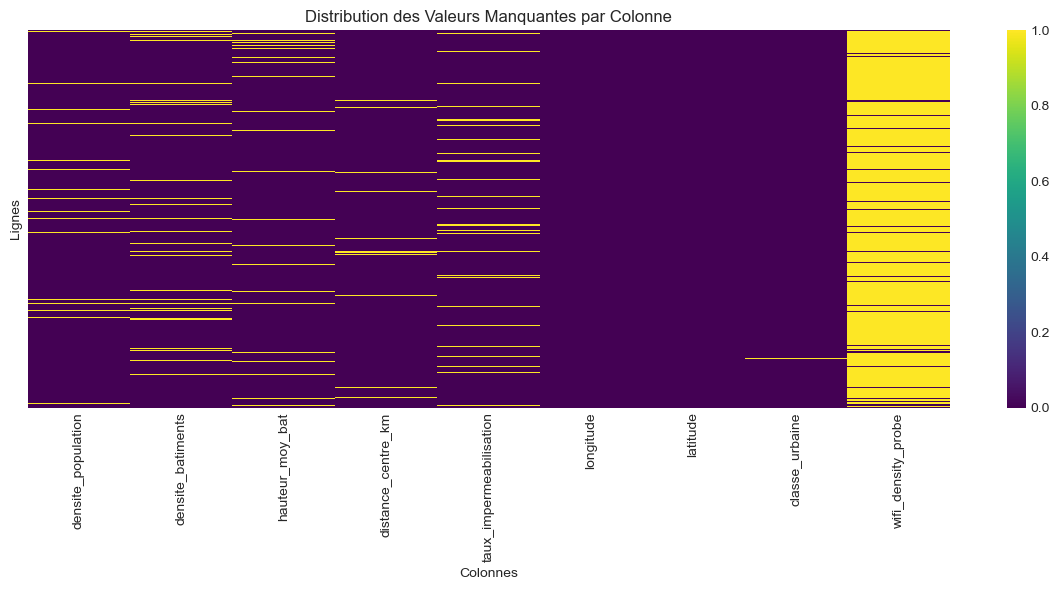


RESUME
   Total de valeurs manquantes : 1694
   Pourcentage global : 12.95%

Etape 5 completee.


In [7]:
# =========================================
# Étape 5 : Analyse des valeurs manquantes
# =========================================

# 1) Calculer le nombre et pourcentage de valeurs manquantes
valeurs_manquantes = pd.DataFrame({
    'Colonne': df.columns,
    'Manquantes (nb)': df.isnull().sum().values,
    'Manquantes (%)': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Trier par pourcentage décroissant
valeurs_manquantes = valeurs_manquantes.sort_values('Manquantes (%)', ascending=False)

print("ANALYSE DES VALEURS MANQUANTES")
print(valeurs_manquantes.to_string(index=False))

# 2) Visualiser avec une heatmap
print("\nHEATMAP DES VALEURS MANQUANTES")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title("Distribution des Valeurs Manquantes par Colonne")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.tight_layout()
plt.show()

# 3) Résumé
total_manquantes = df.isnull().sum().sum()
total_cellules = df.shape[0] * df.shape[1]
print(f"\nRESUME")
print(f"   Total de valeurs manquantes : {total_manquantes}")
print(f"   Pourcentage global : {total_manquantes / total_cellules * 100:.2f}%")

print("\nEtape 5 completee.")


## 6. Traitement des Valeurs Manquantes

**Objectif : conserver un dataset exploitable**

- Supprimer : lignes quasi vides (>30% manquantes)
- Imputer les variables numériques : médiane
- Pas d'imputation de la variable cible `classe_urbaine`

**Justification** : L'imputation limite la perte d'information sans biais majeur


In [8]:
# =========================================
# Étape 6 : Traitement des valeurs manquantes
# =========================================

df_avant_traitement = len(df)
print(f"AVANT TRAITEMENT : {df_avant_traitement} lignes")

# 1) Supprimer les lignes quasi vides (plus de 30% de valeurs manquantes)
seuil_manquantes = 0.3
nb_colonnes = df.shape[1]
df = df.dropna(thresh=nb_colonnes * (1 - seuil_manquantes))

print(f"Apres suppression des lignes quasi vides : {len(df)} lignes")

# 2) Séparer les variables numériques et catégoriques
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()
colonnes_categoriques = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVARIABLES NUMERIQUES : {len(colonnes_numeriques)}")
print(f"   {colonnes_numeriques}")

print(f"\nVARIABLES CATEGORIQUES : {len(colonnes_categoriques)}")
print(f"   {colonnes_categoriques}")

# 3) Imputer les variables numériques avec la médiane
print(f"\nIMPUTATION DES VALEURS MANQUANTES (mediane)")
for col in colonnes_numeriques:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"   {col} : {df[col].isnull().sum()} → 0 (médiane : {median_val:.2f})")

# 4) Pour les variables catégoriques, imputer avec le mode
print(f"\nIMPUTATION DES VALEURS CATEGORIQUES (mode)")
for col in colonnes_categoriques:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else "inconnu"
        df[col].fillna(mode_val, inplace=True)
        print(f"   {col} : {df[col].isnull().sum()} → 0 (mode : {mode_val})")

# 5) Vérifier qu'il n'y a plus de valeurs manquantes (sauf pour la cible)
print(f"\nVERIFICATION FINALE")
print(f"   Valeurs manquantes restantes : {df.isnull().sum().sum()}")
print(f"   Lignes finales : {len(df)} (supprimées : {df_avant_traitement - len(df)})")

print("\nEtape 6 completee.")


AVANT TRAITEMENT : 1453 lignes
Apres suppression des lignes quasi vides : 1411 lignes

VARIABLES NUMERIQUES : 8
   ['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'longitude', 'latitude', 'wifi_density_probe']

VARIABLES CATEGORIQUES : 1
   ['classe_urbaine']

IMPUTATION DES VALEURS MANQUANTES (mediane)
   densite_population : 0 → 0 (médiane : 3612.06)
   densite_batiments : 0 → 0 (médiane : 42.35)
   hauteur_moy_bat : 0 → 0 (médiane : 17.76)
   distance_centre_km : 0 → 0 (médiane : 7.45)
   taux_impermeabilisation : 0 → 0 (médiane : 0.56)
   wifi_density_probe : 0 → 0 (médiane : 124.65)

IMPUTATION DES VALEURS CATEGORIQUES (mode)
   classe_urbaine : 0 → 0 (mode : faible)

VERIFICATION FINALE
   Valeurs manquantes restantes : 0
   Lignes finales : 1411 (supprimées : 42)

Etape 6 completee.


## 7. Détection des Valeurs Aberrantes (Outliers)

**Objectif : améliorer la robustesse des modèles**

- Identifier les outliers : IQR, boxplots
- Décider : conservation ou suppression (justifiée)

**Justification** : Les valeurs extrêmes peuvent perturber certains modèles (KNN, SVM)


DETECTION DES OUTLIERS (Methode IQR)

densite_population
   Q1 = 2411.36, Q3 = 4710.04, IQR = 2298.68
   Limites : [-1036.67, 8158.07]
   Outliers détectés : 4 (0.28%)

hauteur_moy_bat
   Q1 = 11.63, Q3 = 24.21, IQR = 12.59
   Limites : [-7.25, 43.09]
   Outliers détectés : 8 (0.57%)

wifi_density_probe
   Q1 = 124.65, Q3 = 124.65, IQR = 0.00
   Limites : [124.65, 124.65]
   Outliers détectés : 144 (10.21%)


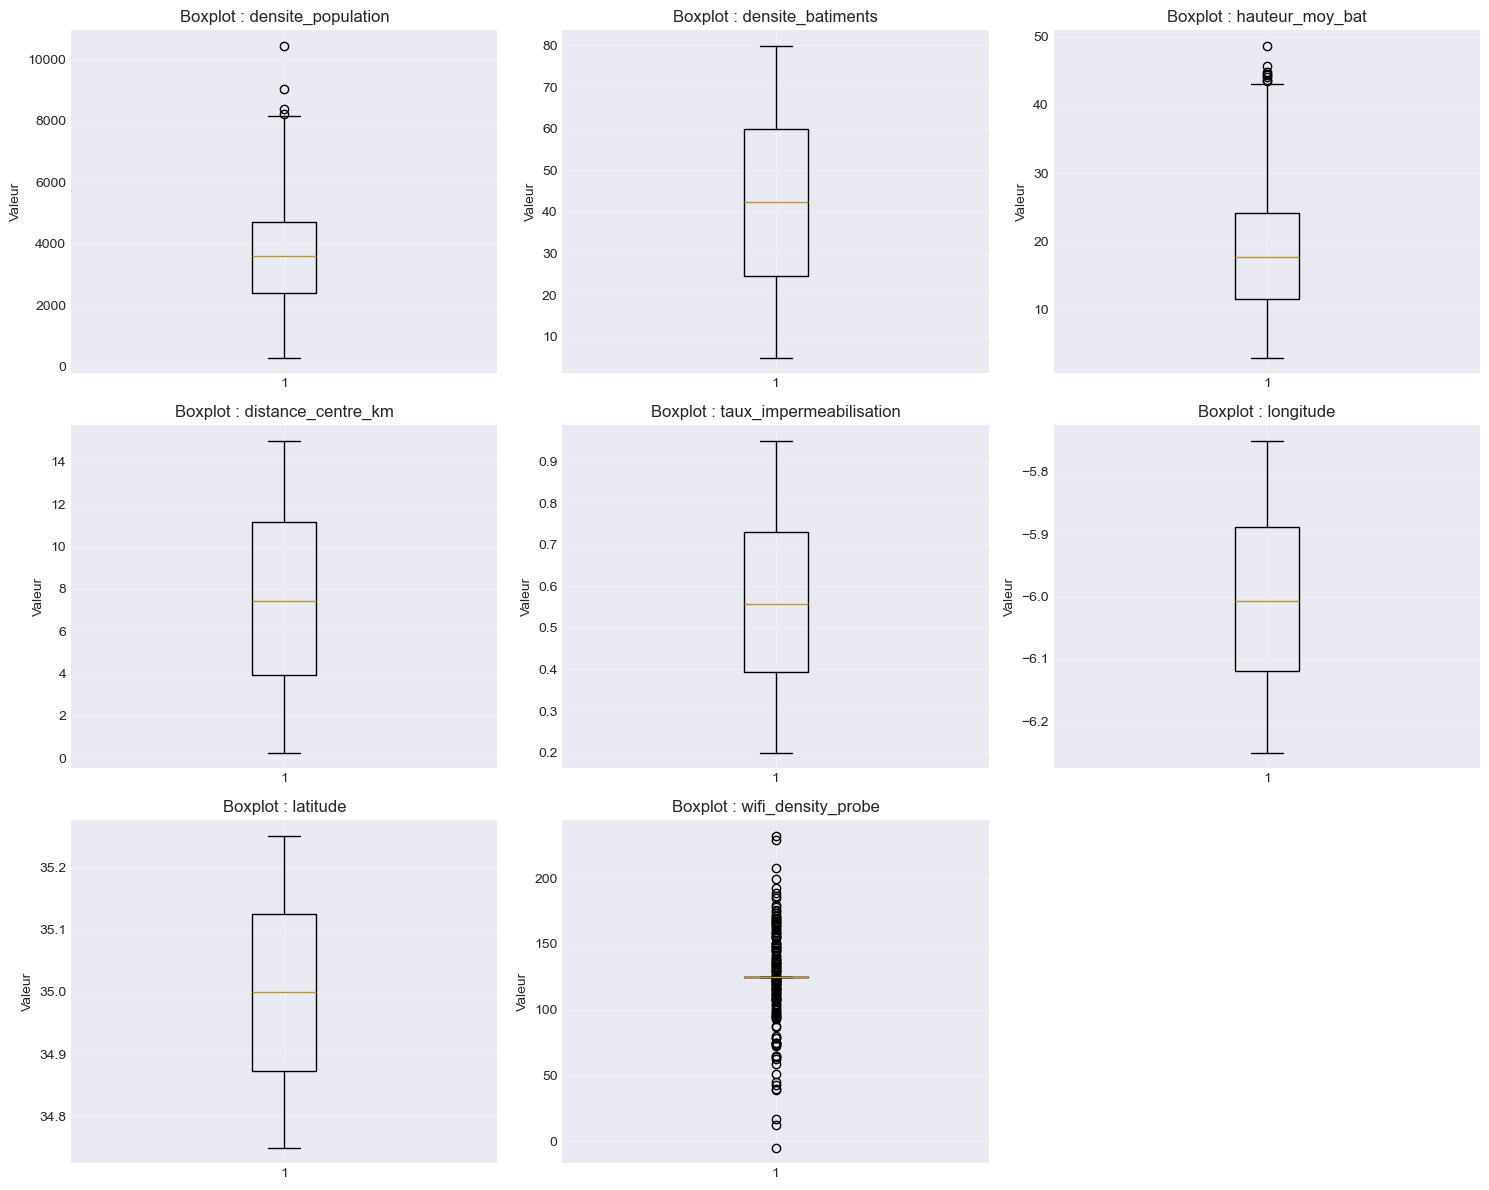


DECISION : CONSERVATION DES OUTLIERS
   Justification : Les valeurs extrêmes peuvent être significatives
   en classification de densité urbaine (zones très denses vs très peu denses)

Etape 7 completee.


In [9]:
# =========================================
# Étape 7 : Détection des valeurs aberrantes (outliers)
# =========================================

# 1) Déterminer les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()

print("DETECTION DES OUTLIERS (Methode IQR)")
print("=" * 60)

outliers_count = {}

# 2) Utiliser la méthode IQR pour détecter les outliers
for col in colonnes_numeriques:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites pour outliers
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    # Compter les outliers
    nb_outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
    outliers_count[col] = nb_outliers
    
    if nb_outliers > 0:
        print(f"\n{col}")
        print(f"   Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
        print(f"   Limites : [{limite_inf:.2f}, {limite_sup:.2f}]")
        print(f"   Outliers détectés : {nb_outliers} ({nb_outliers/len(df)*100:.2f}%)")

# 3) Visualiser avec boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(colonnes_numeriques):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f"Boxplot : {col}")
    axes[idx].set_ylabel("Valeur")
    axes[idx].grid(True, alpha=0.3)

# Masquer les subplots vides
for idx in range(len(colonnes_numeriques), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# 4) Décision : garder les outliers (peuvent être significatifs en géospatial)
print("\nDECISION : CONSERVATION DES OUTLIERS")
print("   Justification : Les valeurs extrêmes peuvent être significatives")
print("   en classification de densité urbaine (zones très denses vs très peu denses)")

print("\nEtape 7 completee.")


## 8. Encodage de la Variable Cible

**Objectif : rendre la cible exploitable par les modèles**

- Encoder `classe_urbaine` :
  - faible → 0
  - moyenne → 1
  - elevee → 2
- Vérifier la cohérence des labels

**Justification** : Les algorithmes ML nécessitent une variable cible numérique


In [10]:
# =========================================
# Étape 8 : Encodage de la variable cible
# =========================================

print("ENCODAGE DE LA VARIABLE CIBLE")
print("=" * 60)

# 1) Afficher les modalités avant encodage
print("\nMODALITES AVANT ENCODAGE")
print(df['classe_urbaine'].value_counts().sort_index())
print(f"\nTypes uniques : {df['classe_urbaine'].unique()}")

# 2) Créer le mapping d'encodage
mapping_cible = {
    'faible': 0,
    'moyenne': 1,
    'elevee': 2,
    'industriel': 3,  # si présent
    'zone_industrielle': 3  # variantes
}

# 3) Vérifier quels labels sont présents
labels_presents = df['classe_urbaine'].unique()
print(f"\nLabels presents dans les donnees : {labels_presents}")

# 4) Encoder la variable cible
df['classe_urbaine_encoded'] = df['classe_urbaine'].map(mapping_cible)

# Gérer les valeurs non mappées
if df['classe_urbaine_encoded'].isnull().sum() > 0:
    print(f"\n{df['classe_urbaine_encoded'].isnull().sum()} valeurs non mappees.")
    # Assigner une classe par défaut ou investiguer
    valeurs_non_mappees = df[df['classe_urbaine_encoded'].isnull()]['classe_urbaine'].unique()
    print(f"   Valeurs non mappees : {valeurs_non_mappees}")
    # Pour l'exemple, on les met en 0 (faible)
    df['classe_urbaine_encoded'].fillna(0, inplace=True)

# 5) Créer une colonne de cible numérique
df['target'] = df['classe_urbaine_encoded'].astype(int)

# 6) Afficher les modalités après encodage
print("\nMODALITES APRES ENCODAGE")
print(df['target'].value_counts().sort_index())

# 7) Vérifier la cohérence
print("\nVERIFICATION DE COHERENCE")
for label, code in mapping_cible.items():
    count = (df['classe_urbaine'] == label).sum()
    if count > 0:
        print(f"   {label:20} → {code} : {count} lignes")

print("\nEtape 8 completee.")


ENCODAGE DE LA VARIABLE CIBLE

MODALITES AVANT ENCODAGE
classe_urbaine
elevee                14
faible               822
industriel            12
moyenne              449
zone_industrielle    114
Name: count, dtype: int64

Types uniques : ['moyenne' 'faible' 'zone_industrielle' 'industriel' 'elevee']

Labels presents dans les donnees : ['moyenne' 'faible' 'zone_industrielle' 'industriel' 'elevee']

MODALITES APRES ENCODAGE
target
0    822
1    449
2     14
3    126
Name: count, dtype: int64

VERIFICATION DE COHERENCE
   faible               → 0 : 822 lignes
   moyenne              → 1 : 449 lignes
   elevee               → 2 : 14 lignes
   industriel           → 3 : 12 lignes
   zone_industrielle    → 3 : 114 lignes

Etape 8 completee.


## 9. Normalisation / Standardisation des Variables Numériques

**Objectif : mettre toutes les variables sur la même échelle**

- Appliquer : `StandardScaler` ou `MinMaxScaler`
- Conserver les paramètres pour le jeu de test

**Justification** : Indispensable pour les modèles basés sur la distance


In [11]:
# =========================================
# Étape 9 : Normalisation / Standardisation
# =========================================

print("STANDARDISATION DES VARIABLES NUMERIQUES")
print("=" * 60)

# 1) Sélectionner les colonnes à standardiser (excluant lat/lon et target)
colonnes_a_standardiser = [col for col in colonnes_numeriques 
                           if col not in ['latitude', 'longitude', 'target']]

print(f"\nCOLONNES A STANDARDISER ({len(colonnes_a_standardiser)})")
print(f"   {colonnes_a_standardiser}")

# 2) Afficher les statistiques AVANT standardisation
print(f"\nSTATISTIQUES AVANT STANDARDISATION")
print(df[colonnes_a_standardiser].describe().round(2))

# 3) Appliquer StandardScaler (moyenne=0, écart-type=1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[colonnes_a_standardiser] = scaler.fit_transform(df[colonnes_a_standardiser])

print(f"\nStandardScaler applique.")
print(f"   Moyenne avant : {df[colonnes_a_standardiser].mean().mean():.4f}")
print(f"   Moyenne après : {df_scaled[colonnes_a_standardiser].mean().mean():.6f}")

# 4) Afficher les statistiques APRÈS standardisation
print(f"\nSTATISTIQUES APRES STANDARDISATION")
print(df_scaled[colonnes_a_standardiser].describe().round(2))

# 5) Créer un dictionnaire pour sauvegarder les paramètres du scaler
parametres_scaler = {
    'mean': dict(zip(colonnes_a_standardiser, scaler.mean_)),
    'scale': dict(zip(colonnes_a_standardiser, scaler.scale_))
}

print(f"\nPARAMETRES DU SCALER SAUVEGARDES")
print(f"   À utiliser pour standardiser le jeu de test")

# 6) Comparaison avant/après
print(f"\n📈 COMPARAISON (exemple avec 1ère colonne)")
print(f"   Avant : min={df[colonnes_a_standardiser[0]].min():.2f}, "
      f"max={df[colonnes_a_standardiser[0]].max():.2f}")
print(f"   Après : min={df_scaled[colonnes_a_standardiser[0]].min():.2f}, "
      f"max={df_scaled[colonnes_a_standardiser[0]].max():.2f}")

# 7) Remplacer le dataframe original par le dataframe standardisé
df = df_scaled

print("\nEtape 9 completee.")


STANDARDISATION DES VARIABLES NUMERIQUES

COLONNES A STANDARDISER (6)
   ['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'wifi_density_probe']

STATISTIQUES AVANT STANDARDISATION
       densite_population  densite_batiments  hauteur_moy_bat  \
count             1411.00            1411.00          1411.00   
mean              3615.16              42.16            18.18   
std               1718.58              21.25             9.09   
min                300.00               5.00             3.00   
25%               2411.36              24.52            11.63   
50%               3612.06              42.35            17.76   
75%               4710.04              59.84            24.21   
max              10434.92              79.88            48.62   

       distance_centre_km  taux_impermeabilisation  wifi_density_probe  
count             1411.00                  1411.00             1411.00  
mean                 7.54

## 10. Vérification Finale après Prétraitement

**Objectif : valider le travail**

- Vérifier : absence de valeurs manquantes, cohérence des distributions
- Afficher : taille finale du dataset, visualisations
- Préparer : split Train/Test

**Justification** : Confirme que le dataset est prêt pour la modélisation


VERIFICATION FINALE DU DATASET PRETRAITE

VALEURS MANQUANTES
   Total : 0
   Aucune valeur manquante detectee.

DIMENSIONS DU DATASET
   Lignes : 1411
   Colonnes : 11

COLONNES FINALES
    1. densite_population             (float64)
    2. densite_batiments              (float64)
    3. hauteur_moy_bat                (float64)
    4. distance_centre_km             (float64)
    5. taux_impermeabilisation        (float64)
    6. longitude                      (float64)
    7. latitude                       (float64)
    8. classe_urbaine                 (object)
    9. wifi_density_probe             (float64)
   10. classe_urbaine_encoded         (int64)
   11. target                         (int64)

DISTRIBUTION DE LA VARIABLE CIBLE
target
0    822
1    449
2     14
3    126
Name: count, dtype: int64

Répartition (%)
target
0    58.26
1    31.82
2     0.99
3     8.93
Name: proportion, dtype: float64


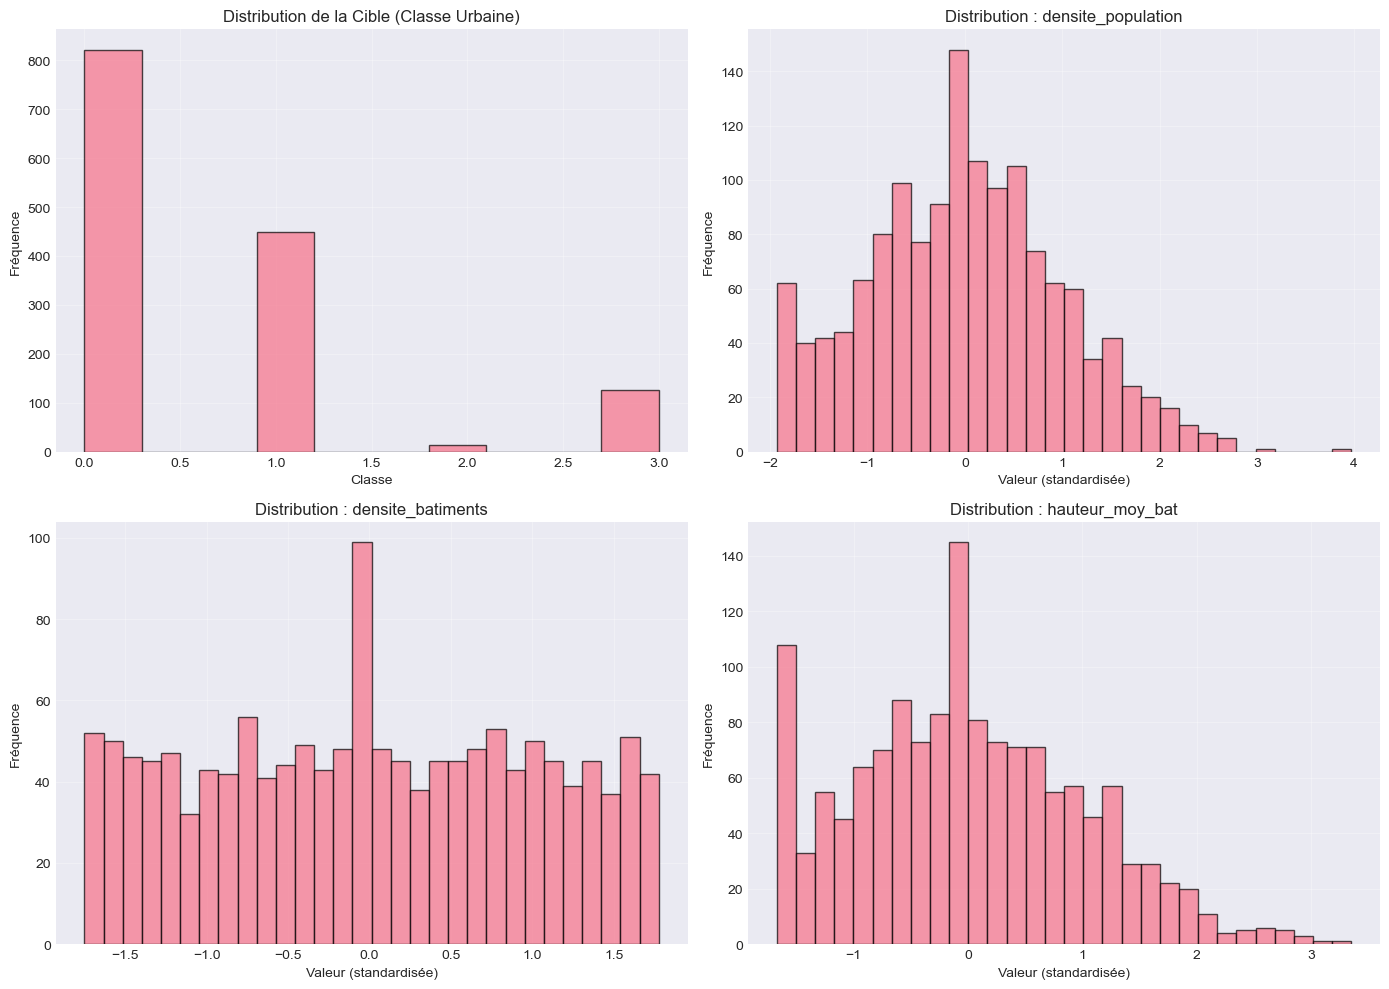


MATRICE DE CORRELATION


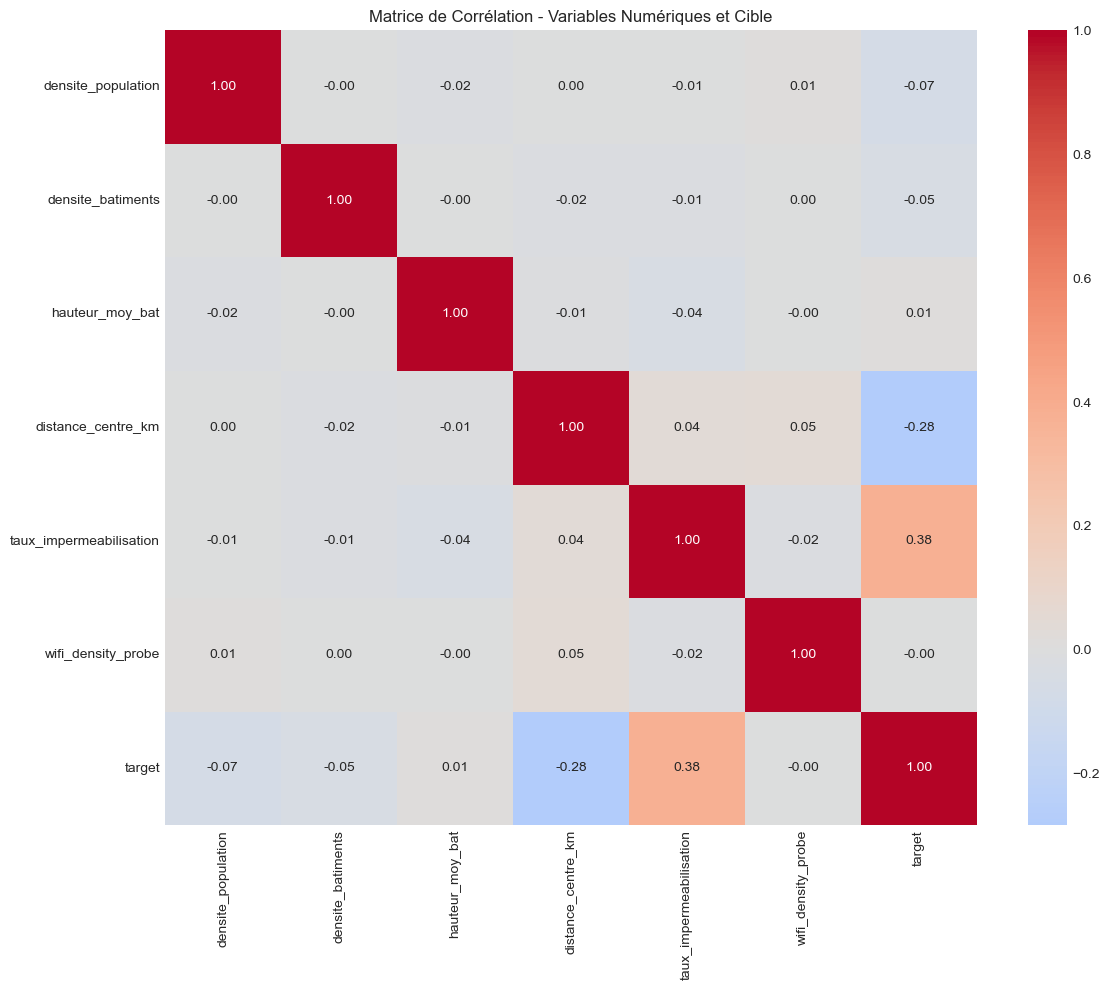


DATASET PRET POUR LA MODELISATION

Resume :
   - Donnees chargees et nettoyees
   - Doublons supprimes
   - Valeurs manquantes traitees
   - Outliers analyses (conserves)
   - Variable cible encodee (0, 1, 2...)
   - Variables numeriques standardisees
   - 1411 lignes x 11 colonnes

Dataset sauvegarde : data/geo_urban_density_data_preprocessed.csv

Etape 10 completee. Le pretraitement est termine.


In [12]:
# =========================================
# Étape 10 : Vérification finale
# =========================================

print("VERIFICATION FINALE DU DATASET PRETRAITE")
print("=" * 60)

# 1) Absence de valeurs manquantes
print("\nVALEURS MANQUANTES")
valeurs_manquantes_finales = df.isnull().sum().sum()
print(f"   Total : {valeurs_manquantes_finales}")
if valeurs_manquantes_finales == 0:
    print("   Aucune valeur manquante detectee.")
else:
    print(f"   {valeurs_manquantes_finales} valeurs manquantes presentes.")

# 2) Dimensions finales du dataset
print(f"\nDIMENSIONS DU DATASET")
print(f"   Lignes : {df.shape[0]}")
print(f"   Colonnes : {df.shape[1]}")

# 3) Afficher les noms des colonnes
print(f"\nCOLONNES FINALES")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    print(f"   {i:2}. {col:30} ({dtype})")

# 4) Statistiques de la variable cible
print(f"\nDISTRIBUTION DE LA VARIABLE CIBLE")
print(df['target'].value_counts().sort_index())
print(f"\nRépartition (%)")
print((df['target'].value_counts(normalize=True).sort_index() * 100).round(2))

# 5) Visualiser les distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogramme de la cible
axes[0, 0].hist(df['target'], bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution de la Cible (Classe Urbaine)')
axes[0, 0].set_xlabel('Classe')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# Distribution de quelques variables numériques
for idx, col in enumerate(colonnes_a_standardiser[:3]):
    row = (idx + 1) // 2
    col_idx = (idx + 1) % 2
    axes[row, col_idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution : {col}')
    axes[row, col_idx].set_xlabel('Valeur (standardisée)')
    axes[row, col_idx].set_ylabel('Fréquence')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6) Matrice de corrélation
print(f"\nMATRICE DE CORRELATION")
plt.figure(figsize=(12, 10))
correlation_matrix = df[colonnes_a_standardiser + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation - Variables Numériques et Cible')
plt.tight_layout()
plt.show()

# 7) Résumé final
print(f"\n" + "=" * 60)
print(f"DATASET PRET POUR LA MODELISATION")
print(f"=" * 60)
print(f"\nResume :")
print(f"   - Donnees chargees et nettoyees")
print(f"   - Doublons supprimes")
print(f"   - Valeurs manquantes traitees")
print(f"   - Outliers analyses (conserves)")
print(f"   - Variable cible encodee (0, 1, 2...)")
print(f"   - Variables numeriques standardisees")
print(f"   - {len(df)} lignes x {len(df.columns)} colonnes")

# 8) Sauvegarder le dataset prétraité
df.to_csv('data/geo_urban_density_data_preprocessed.csv', index=False)
print(f"\nDataset sauvegarde : data/geo_urban_density_data_preprocessed.csv")

print("\nEtape 10 completee. Le pretraitement est termine.")


## 11. Separation Train/Test et Modeles de Base

**Objectif : demarrer l apprentissage automatique**

- Separer les donnees en Train/Test
- Entraîner quelques modeles de base
- Evaluer les performances initiales


In [13]:
# =========================================
# Étape 11 : Separation Train/Test
# =========================================

from sklearn.model_selection import train_test_split

# 1) Definir la cible et les variables explicatives
cible = "target"

# Exclure les colonnes non utilisables pour le modele
colonnes_exclues = {cible, "classe_urbaine", "classe_urbaine_encoded", "latitude", "longitude"}
features = [col for col in df.columns if col not in colonnes_exclues]

print("COLONNES UTILISEES POUR LE MODELE")
print(features)

X = df[features]
y = df[cible]

# 2) Separation Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTAILLES DES ENSEMBLES")
print(f"Train : {X_train.shape}, Test : {X_test.shape}")


COLONNES UTILISEES POUR LE MODELE
['densite_population', 'densite_batiments', 'hauteur_moy_bat', 'distance_centre_km', 'taux_impermeabilisation', 'wifi_density_probe']

TAILLES DES ENSEMBLES
Train : (1128, 6), Test : (283, 6)
